# Import libraries

In [24]:
# Import libraries and modules
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os

# read the Dataset

In [2]:
# load the data set 
data_train = np.load("dataverse_files (1)/Dataset5_raw_train.npz")
data_test = np.load("dataverse_files (1)/Dataset5_raw_test.npz")
data_val = np.load("dataverse_files (1)/Dataset5_raw_val.npz")

In [3]:
# Extract the images' pixels
img_content_train = (data_train['image']).astype('uint8')
img_content_test = (data_test['image']).astype('uint8')
img_content_val = (data_val['image']).astype('uint8')

In [4]:
# extract the images' labels
label_train = data_train['image_label']
label_test = data_test['image_label']
label_val = data_val['image_label']

In [5]:
# check the number and size  of train images
img_content_train.shape

(19610, 224, 224, 3)

In [6]:
# check the number and size of test images
img_content_test.shape

(6540, 224, 224, 3)

In [7]:
# check the number and size of validation images
img_content_val.shape

(6534, 224, 224, 3)

**we have 19610 on train and 6540 on test 6534 on validation data set all colored images with size 224*224, all the images have the same size, no need to change the size.**

In [8]:
# check the classes of the images
label_train

array([[0.],
       [0.],
       [0.],
       ...,
       [4.],
       [4.],
       [4.]])

**we have from 0-4 classes this mean we have 5 classes in our data set.**

# EDA 

In [9]:
# save the images labels in a data frames to make it easy for the EDA.
train_label_df = (pd.DataFrame(label_train)).set_axis(["label"],axis=1)
test_label_df =(pd.DataFrame(label_test)).set_axis(["label"],axis=1)
val_label_df = (pd.DataFrame(label_val)).set_axis(["label"],axis=1)

In [11]:
train_label_df.head()

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


## Train Image

In [12]:
# Add a column for each classes name
values = ['COVID-19 ', 'Lung-Opacity', 'Normal', 'Viral Pneumonia', 'Tuberculosis']
conditions = [
    (train_label_df['label'] == 0),
    (train_label_df['label'] == 1),
    (train_label_df['label'] == 2),
    (train_label_df['label'] == 3), (train_label_df['label'] == 4)
    ]
train_label_df['class_name'] = np.select(conditions, values)

In [1]:
train_label_df.head

NameError: name 'train_label_df' is not defined

### Test Image

In [15]:
# creat colume with name for each class
values = ['COVID-19 ', 'Lung-Opacity', 'Normal', 'Viral Pneumonia', 'Tuberculosis']
conditions = [
    (test_label_df['label'] == 0),
    (test_label_df['label'] == 1),
    (test_label_df['label'] == 2),
    (test_label_df['label'] == 3), (test_label_df['label'] == 4)
    ]
test_label_df['class_name'] = np.select(conditions, values)

In [16]:
test_label_df.head()

,label,class_name
0,0.0,COVID-19
1,0.0,COVID-19
2,0.0,COVID-19
3,0.0,COVID-19
4,0.0,COVID-19


## Validation Image

In [17]:
# creat colume with name oof each class
values = ['COVID-19 ', 'Lung-Opacity', 'Normal', 'Viral Pneumonia', 'Tuberculosis']
conditions = [
    (val_label_df['label'] == 0),
    (val_label_df['label'] == 1),
    (val_label_df['label'] == 2),
    (val_label_df['label'] == 3), (val_label_df['label'] == 4)
    ]
val_label_df['class_name'] = np.select(conditions, values)

In [18]:
val_label_df.head()

,label,class_name
0,0.0,COVID-19
1,0.0,COVID-19
2,0.0,COVID-19
3,0.0,COVID-19
4,0.0,COVID-19


## visualization of the images

Text(0.5, 1.0, 'Validation Image')

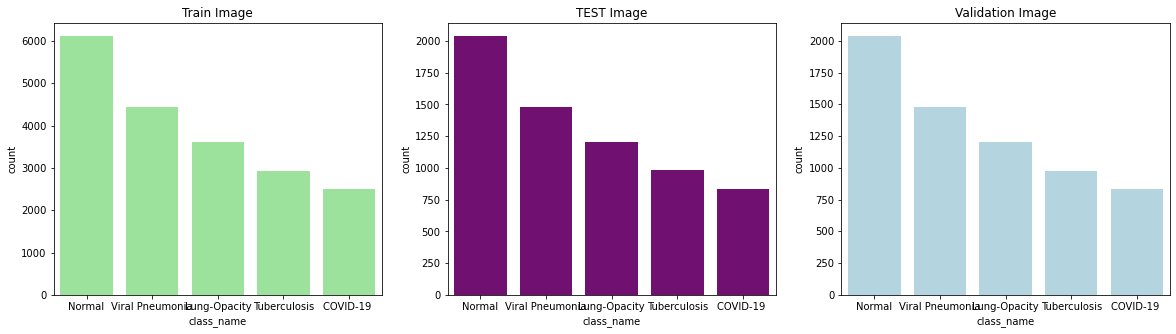

In [25]:
## check the distribution of the classes for each dataset(train, test and validation) using histogram
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.countplot(data=train_label_df, x='class_name', orient='h', ax=ax1, color='lightgreen',
              order = train_label_df['class_name'].value_counts().index)
ax1.set_title('Train Image')
sns.countplot(data=test_label_df, x='class_name', orient='h', ax=ax2, color='purple',
              order = test_label_df['class_name'].value_counts().index)
ax2.set_title('TEST Image')
sns.countplot(data=val_label_df, x='class_name', orient='h', ax=ax3, color='lightblue',
              order = val_label_df['class_name'].value_counts().index)
ax3.set_title('Validation Image')

## All the data sets have the same distribution of the classes

In [26]:
## get the number of each class in each dataframe
##train data
train_label_df['class_name'].value_counts()

Normal             6115
Viral Pneumonia    4438
Lung-Opacity       3607
Tuberculosis       2938
COVID-19           2512
Name: class_name, dtype: int64

In [27]:
##test data
test_label_df['class_name'].value_counts()

Normal             2039
Viral Pneumonia    1480
Lung-Opacity       1203
Tuberculosis        980
COVID-19            838
Name: class_name, dtype: int64

In [28]:
##validation data
val_label_df['class_name'].value_counts()

Normal             2038
Viral Pneumonia    1479
Lung-Opacity       1202
Tuberculosis        979
COVID-19            836
Name: class_name, dtype: int64

In [ ]:
# get the index of the label, we will use it for the visualization of the images
train_index = train_label_df.index
test_index = test_label_df.index
val_index = val_label_df.index

## Train images

In [ ]:
##Visulaize different images from different classes
f,ax= plt.subplots(5, 5, figsize=(18, 18),
     subplot_kw={'xticks': [], 'yticks': []})
#train
for i in range(5):
    #coveid_19
    ax[0, i].imshow(img_content_train[i,:,:,:])
    #Lung-Opacity
    ax[1, i].imshow(img_content_train[i+2512,:,:,:])
    #Normal
    ax[2, i].imshow(img_content_train[i+6119,:,:,:])
    #Viral Pneumonia
    ax[3, i].imshow(img_content_train[i+12234,:,:,:])
    #Tuberculosis
    ax[4, i].imshow(img_content_train[i+16672,:,:,:])
ax[0, 0].set_ylabel('COVID-19')
ax[1, 0].set_ylabel('Lung-Opacity')
ax[2, 0].set_ylabel('Normal')
ax[3, 0].set_ylabel('Viral Pneumonia')
ax[4, 0].set_ylabel('Tuberculosis')
ax[0,2].set_title('Train Image', color='green')

## Test images

In [ ]:
f,ax= plt.subplots(5, 5, figsize=(18, 18),
     subplot_kw={'xticks': [], 'yticks': []})
#test
for i in range(5):
    #coveid_19
    ax[0, i].imshow(img_content_test[i,:,:,:])
    #Lung-Opacity
    ax[1, i].imshow(img_content_test[i+838,:,:,:])
    #Normal
    ax[2, i].imshow(img_content_test[i+2041,:,:,:])
    #Viral Pneumonia
    ax[3, i].imshow(img_content_test[i+4080,:,:,:])
    #Tuberculosis
    ax[4, i].imshow(img_content_test[i+5560,:,:,:])
ax[0, 0].set_ylabel('COVID-19')
ax[1, 0].set_ylabel('Lung-Opacity')
ax[2, 0].set_ylabel('Normal')
ax[3, 0].set_ylabel('Viral Pneumonia')
ax[4, 0].set_ylabel('Tuberculosis')
ax[0,2].set_title('Test Image', color='green')

## Validation images

In [ ]:
f,ax= plt.subplots(5, 5, figsize=(18, 18),
     subplot_kw={'xticks': [], 'yticks': []})
#train
for i in range(5):
    #coveid_19
    ax[0, i].imshow(img_content_val[i,:,:,:])
    #Lung-Opacity
    ax[1, i].imshow(img_content_val[i+836,:,:,:])
    #Normal
    ax[2, i].imshow(img_content_val[i+2038,:,:,:])
    #Viral Pneumonia
    ax[3, i].imshow(img_content_val[i+4076,:,:,:])
    #Tuberculosis
    ax[4, i].imshow(img_content_val[i+5555,:,:,:])
ax[0, 0].set_ylabel('COVID-19')
ax[1, 0].set_ylabel('Lung-Opacity')
ax[2, 0].set_ylabel('Normal')
ax[3, 0].set_ylabel('Viral Pneumonia')
ax[4, 0].set_ylabel('Tuberculosis')
ax[0,2].set_title('val Image', color='green')